In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [12]:
hotels = pd.read_excel("../data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Assignment 1: Subplots

Plot The distribution of lodging revenue for our top 5 countries by revenue ("PRT, "ESP", "FRA", "DEU", "GBR").

**Limit Data to Bookings with RoomNights < 15**

Make sure to share both x and y axes and give them titles!

Remove the extra chart with `ax[row, col].set_axis_off()` if using plt.subplots()


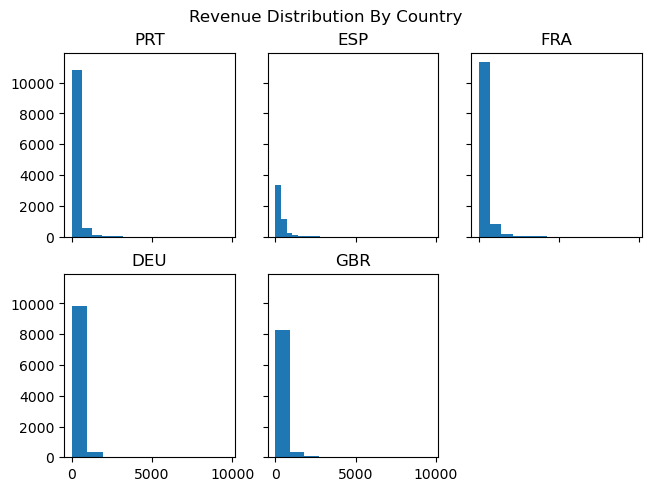

In [23]:
fig, ax = plt.subplots(2,3, constrained_layout=True, sharex="all", sharey="all")
fig.suptitle("Revenue Distribution By Country")

ax[0][0].hist(
    hotels.query("Nationality == 'PRT' and RoomNights < 15").loc[:, "LodgingRevenue"]
) 
ax[0][0].set_title("PRT")

ax[0][1].hist(
    hotels.query("Nationality == 'ESP' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][1].set_title("ESP")

ax[0][2].hist(
    hotels.query("Nationality == 'FRA' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][2].set_title("FRA")

ax[1][0].hist(
    hotels.query("Nationality == 'DEU' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][0].set_title("DEU")

ax[1][1].hist(
    hotels.query("Nationality == 'GBR' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][1].set_title("GBR")

ax[1,2 ].set_axis_off()


# Assignment 2: GridSpec

* Build a Gridspec layout with a line chart plotting Lodging Revenue Vs. Hotel Revenue for all countries at the top of your report.

* Build a bar chart of total revenue (Lodging + Other Revenue) by country for our top 5 countries

* Build a Donut Chart Specifying 67% of the way to our Goal of French Revenue for the year

In [36]:
hotels = hotels.assign(
    date = pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"]
)

# Prep Data For Line Chart

monthly_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue": "sum", "OtherRevenue": "sum", "total_revenue": "sum"})
    .resample("M")
    .sum()
)

monthly_revenue.head()

,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [37]:
# Bar Chart Data
rev_by_country = (
    hotels.groupby("Nationality")
    .agg({"total_revenue": "sum"})
    .sort_values("total_revenue", ascending=False)
    .iloc[:5]
)

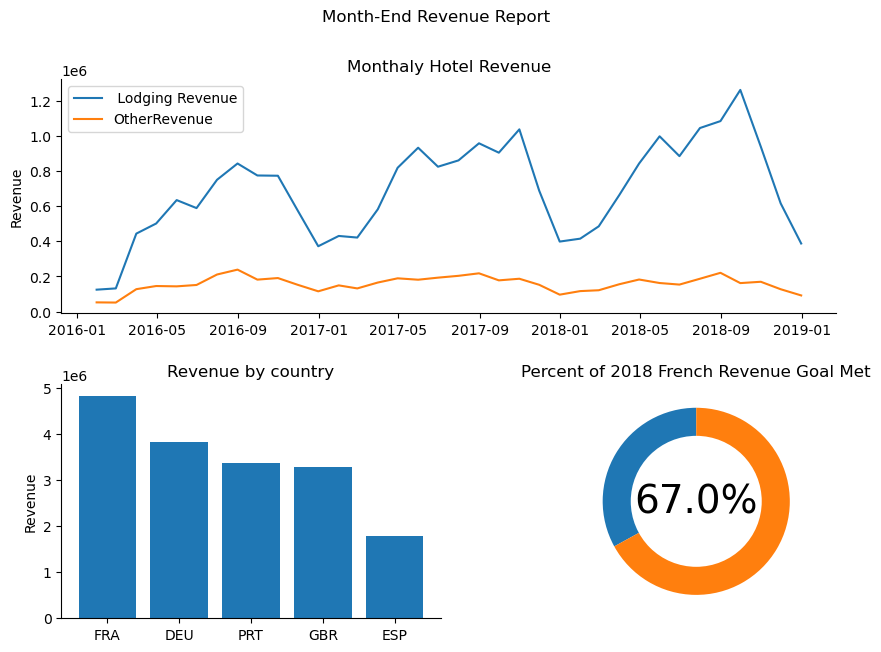

In [80]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(ncols=8, nrows=9)

fig.suptitle("Month-End Revenue Report")

#line chart
ax1 = fig.add_subplot(gs[:4,:])
ax1.plot(
        monthly_revenue.index,
        monthly_revenue["LodgingRevenue"],
        label=" Lodging Revenue")
ax1.plot(
        monthly_revenue.index,
        monthly_revenue["OtherRevenue"],
        label="OtherRevenue"
)
ax1.set_title("Monthaly Hotel Revenue")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.legend()
ax1.set_ylabel("Revenue")


#bar chart
ax2 = fig.add_subplot(gs[5:9,:4])
ax2.bar(rev_by_country.index,rev_by_country["total_revenue"])
ax2.set_title("Revenue by country")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_ylabel("Revenue")

#pie chart
ax3 = fig.add_subplot(gs[5:9,5:8])
pie_list = [0.33, 0.67]
ax3.pie(
    pie_list,
    startangle=90,
)
ax3.set_title("Percent of 2018 French Revenue Goal Met")

hole=plt.Circle((0,0),0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(hole)

ax3.text(
    0, 0, 
    f"{pie_list[1] * 100}%", 
    ha="center", 
    va="center", 
    fontsize=28
)


plt.show()

# Assignment 3: Colors

* Apply the Set2 Colormap to the line chart.
* Look up the national colors of our top 5 countries and color each bar in the bar chart accordingly. The hex codes for colors can be looked up at https://flagcolor.com/.
* Finally, make the donut chart French Blue, and white out the secondary slice.

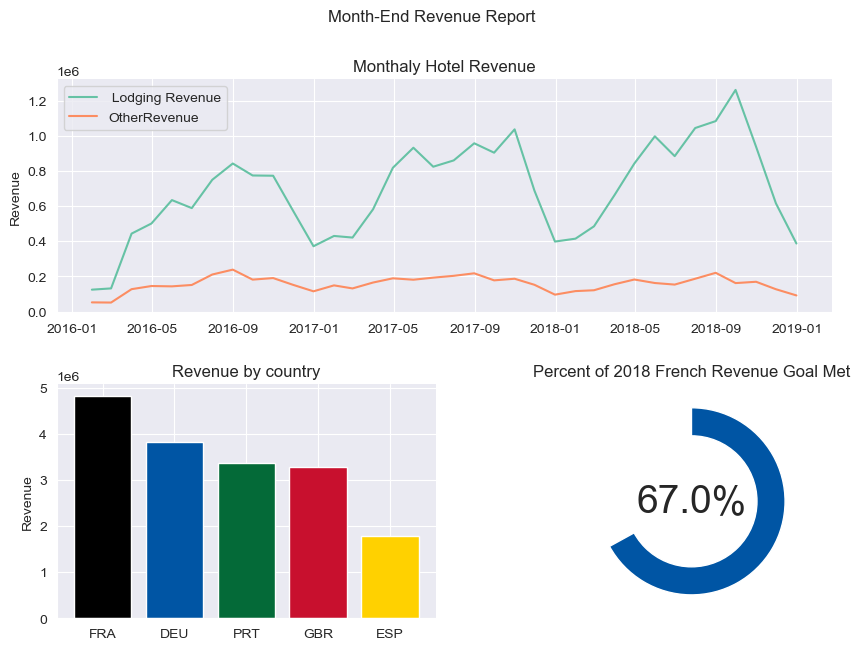

In [86]:
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style("darkgrid")

plt.rcParams["axes.prop_cycle"]=plt.cycler("color",plt.cm.Set2.colors)





fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(ncols=8, nrows=9)

fig.suptitle("Month-End Revenue Report")

#line chart
ax1 = fig.add_subplot(gs[:4,:])
ax1.plot(
        monthly_revenue.index,
        monthly_revenue["LodgingRevenue"],
        label=" Lodging Revenue")
ax1.plot(
        monthly_revenue.index,
        monthly_revenue["OtherRevenue"],
        label="OtherRevenue"
)
ax1.set_title("Monthaly Hotel Revenue")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.legend()
ax1.set_ylabel("Revenue")


#bar chart
colors = ["black", "#0055A4", "#046A38", "#C8102E", "#FFD100"]
ax2 = fig.add_subplot(gs[5:9,:4])
ax2.bar(rev_by_country.index,rev_by_country["total_revenue"],color=colors)
ax2.set_title("Revenue by country")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.set_ylabel("Revenue")

#pie chart
ax3 = fig.add_subplot(gs[5:9,5:8])
pie_list = [0.33, 0.67]
ax3.pie(
    pie_list,
    startangle=90,
    colors=["white", "#0055A4"]
)
ax3.set_title("Percent of 2018 French Revenue Goal Met")

hole=plt.Circle((0,0),0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(hole)

ax3.text(
    0, 0, 
    f"{pie_list[1] * 100}%", 
    ha="center", 
    va="center", 
    fontsize=28
)


plt.show()

# Assignment 4: Stylesheets
* Apply a stylesheet to the above code

In [87]:
#style added in above code as darkgrid from seaborn as sns